### Badgeholder Survery

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [84]:
data = {
    'Badgeholder': ['Badgeholder 1', 'Badgeholder 1', 'Badgeholder 1', 'Badgeholder 1', 'Badgeholder 1',
                    'Badgeholder 2', 'Badgeholder 2', 'Badgeholder 2', 'Badgeholder 2', 'Badgeholder 2',
                    'Badgeholder 3', 'Badgeholder 3', 'Badgeholder 3', 'Badgeholder 3', 'Badgeholder 3',
                    'Badgeholder 4', 'Badgeholder 4', 'Badgeholder 4', 'Badgeholder 4', 'Badgeholder 4',
                    'Badgeholder 5', 'Badgeholder 5', 'Badgeholder 5', 'Badgeholder 5', 'Badgeholder 5',
                    'Badgeholder 6', 'Badgeholder 6', 'Badgeholder 6', 'Badgeholder 6', 'Badgeholder 6',
                    'Badgeholder 7', 'Badgeholder 7', 'Badgeholder 7', 'Badgeholder 7', 'Badgeholder 7',
                    'Badgeholder 8', 'Badgeholder 8', 'Badgeholder 8', 'Badgeholder 8', 'Badgeholder 8'],
    'Prompt': ['Clarity in the Round\'s Scope', 'Workload for Badgeholders',
               'Overall Voting Experience', 'Quality of Projects and Applications', 'Likelihood to Participate Again'] * 8,
        'Promptshort': ['Clarity', 'Workload','Overall Experience', 'Project Quality', 'Participate Again'] * 8,
    'Value': [3, 3, 3, 3, 5,
              5, 5, 5, 4, 5,
              4, 3, 3, 3, 5,
              5, 5, 3, 2, 5,
              2, 3, 3, 2, 4,
              3, 3, 4, 4, 5,
              3, 4, 4, 4, 4,
              2, 5, 3, 4, 5]
}

# Create a DataFrame
df = pd.DataFrame(data)

/var/folders/_t/17gdg2x95_s7vvqg6r69vbbc0000gn/T/ipykernel_7358/1085296088.py:55: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


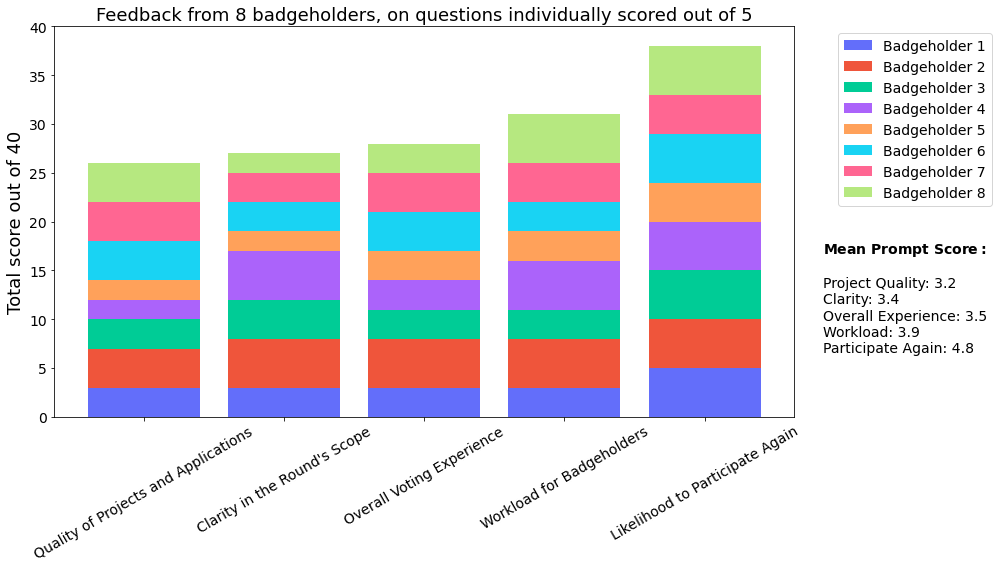

In [108]:
# Updated color scheme
colors = [
    "#636efa",
    "#EF553B",
    "#00cc96",
    "#ab63fa",
    "#FFA15A",
    "#19d3f3",
    "#FF6692",
    "#B6E880",
]

# Calculate total scores for each prompt
total_scores = df.groupby('Prompt')['Value'].sum().sort_values(ascending=True)
sorted_prompts = total_scores.index.tolist()

total_scores_short = df.groupby('Promptshort')['Value'].sum().sort_values(ascending=True)
sorted_promptshort = total_scores_short.index.tolist()

fig, ax = plt.subplots(figsize=(14, 8))

# List of badgeholders
badgeholders = df['Badgeholder'].unique()

# Plot data for each badgeholder
bottom_values = [0] * len(sorted_prompts)

for idx, badgeholder in enumerate(badgeholders):
    badgeholder_data = df[df['Badgeholder'] == badgeholder].set_index('Prompt').reindex(sorted_prompts).fillna(0)
    ax.bar(sorted_prompts, badgeholder_data['Value'], bottom=bottom_values, label=badgeholder, color=colors[idx % len(colors)])
    bottom_values += badgeholder_data['Value']

# Set the title and labels
ax.set_title('Feedback from 8 badgeholders, on questions individually scored out of 5', fontsize=18)
ax.set_ylabel('Total score out of 40', fontsize=18)
ax.set_ylim(0, 40)

# Rotate x-axis labels for better readability
plt.xticks(rotation=30, ha='center', fontsize=14)
plt.yticks(fontsize=14)

# Add legend without the title
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=14)

# Calculate the mean value for each prompt
mean_values = df.groupby('Promptshort')['Value'].mean().reindex(sorted_promptshort).round(1)

# Create an inset plot for the mean values as text
inset_ax = fig.add_axes([0.72, 0.3, 0.2, 0.35])
inset_ax.axis('off')
mean_text = "\n".join([f"{promptshort}: {mean_value:.1f}" for promptshort, mean_value in mean_values.items()])
inset_ax.text(0.5, 0.5, f"$\\bf{{Mean\\ Prompt\\ Score:\\:}}$\n\n{mean_text}", horizontalalignment='left', verticalalignment='center', fontsize=14)

# Display the plot
plt.tight_layout()
plt.show()

<ipython-input-3-ea0f4764a740>:57: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


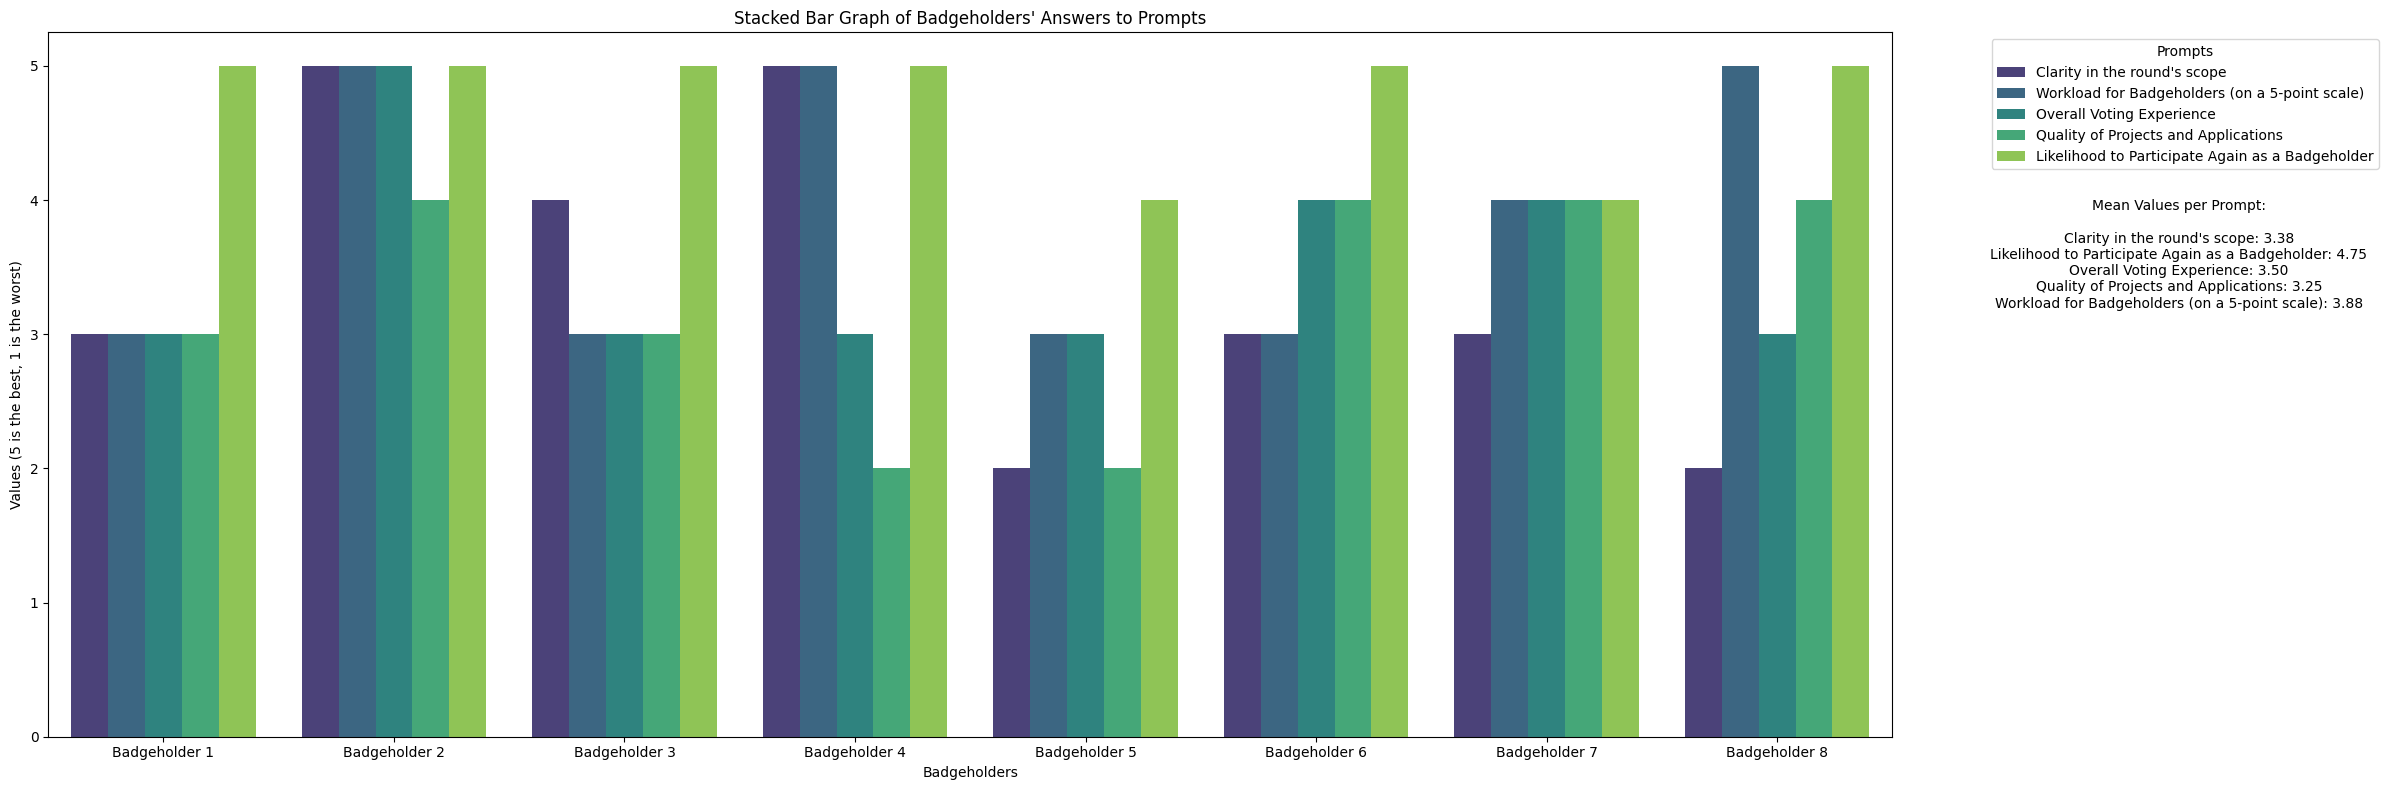

In [3]:
# Set the figure size
fig, ax = plt.subplots(figsize=(24, 8))

# Create a color palette
palette = sns.color_palette("viridis", len(df['Prompt'].unique()))

# Create a bar plot
sns.barplot(data=df, x='Badgeholder', y='Value', hue='Prompt', palette=palette, ax=ax)

# Adding labels and title
ax.set_ylabel('Values (5 is the best, 1 is the worst)')
ax.set_xlabel('Badgeholders')
ax.set_title('Stacked Bar Graph of Badgeholders\' Answers to Prompts')

# Add legend
ax.legend(title='Prompts', bbox_to_anchor=(1.05, 1), loc='upper left')

# Calculate the mean value for each prompt
mean_values = df.groupby('Prompt')['Value'].mean()

# Create an inset plot for the mean values as text
inset_ax = fig.add_axes([0.8, 0.5, 0.2, 0.35])
inset_ax.axis('off')
mean_text = "\n".join([f"{prompt}: {mean_value:.2f}" for prompt, mean_value in mean_values.items()])
inset_ax.text(0.55, 0.5, f"Mean Values per Prompt:\n\n{mean_text}", horizontalalignment='center', verticalalignment='center', fontsize=10)

# Show plot
plt.tight_layout()
plt.show()


### Input, number of applications

<ipython-input-4-0a741f770ca2>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=xx, y=yy, ax=axx, palette=colors)
<ipython-input-4-0a741f770ca2>:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  axx.set_xticklabels(axx.get_xticklabels(), ha='right')


[Text(0, 0, 'Infra & Deps'),
 Text(1, 0, 'Edu & Outreach'),
 Text(2, 0, 'Tools & Utilities'),
 Text(3, 0, 'Protocol R&D'),
 Text(4, 0, 'Product & UX'),
 Text(5, 0, 'Governance'),
 Text(6, 0, 'Other')]

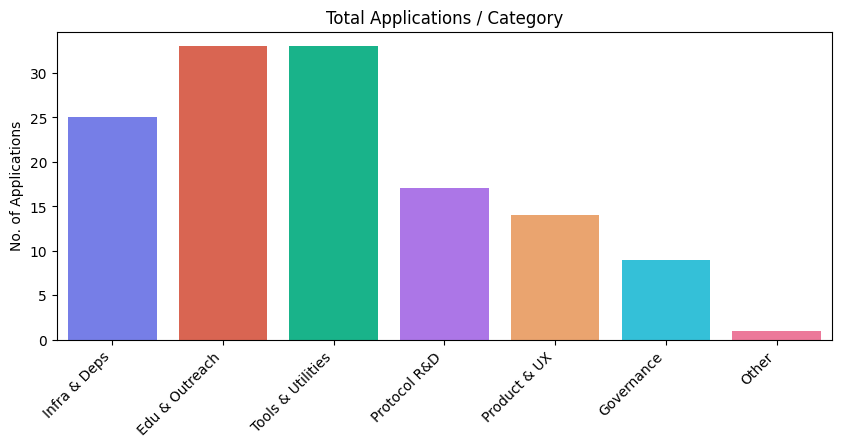

In [4]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,4))
axx = ax

colors = [
    "#636efa",
    "#EF553B",
    "#00cc96",
    "#ab63fa",
    "#FFA15A",
    "#19d3f3",
    "#FF6692",
]

xx = ['Infra & Deps', 'Edu & Outreach', 'Tools & Utilities', 'Protocol R&D', 'Product & UX', 'Governance', 'Other']
yy = [25, 33, 33, 17, 14, 9, 1]
sns.barplot(x=xx, y=yy, ax=axx, palette=colors)
axx.set_title('Total Applications / Category')
axx.set_ylabel('No. of Applications')
axx.set_xlabel('')
axx.tick_params(axis='x', labelrotation=45)
axx.set_xticklabels(axx.get_xticklabels(), ha='right')

### Applicant Survey Results

Text(1, 25, 'Average = 4.4')

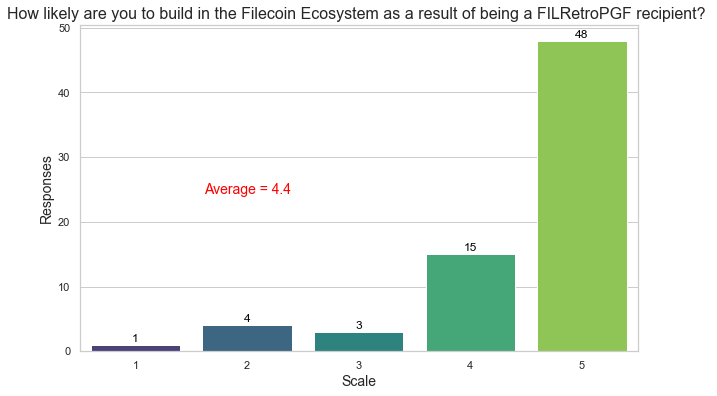

In [109]:
data = {
    'Category': ['1', '2', '3', '4', '5'],
    'Values': [1,4,3,15,48]
}

df = pd.DataFrame(data)

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x='Category', y='Values', data=df, palette='viridis')

bar_plot.set_title('How likely are you to build in the Filecoin Ecosystem as a result of being a FILRetroPGF recipient? ', fontsize=16)
bar_plot.set_xlabel('Scale', fontsize=14)
bar_plot.set_ylabel('Responses', fontsize=14)

for index, row in df.iterrows():
    bar_plot.text(index, row.Values + 0.5, round(row.Values, 2), color='black', ha="center")

plt.text(x=1, y=25, s="Average = 4.4", fontsize=14, color='red', ha='center', va='center')
